# TP2: comparaison de méthodes de débruitage et moyenne non-locales

## Modules et fonctions utiles

In [2]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 16.8 MB/s eta 0:00:00


In [3]:
# Python modules
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import time

In [2]:
# Fonctions utiles (à compléter)

In [4]:
# Rapport signal à bruit
def SNR(I, I_noise):
    signal_power = np.mean(I**2)
    noise_power = np.mean((I - I_noise)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr
def PSNR(I, I_noise):
    max_intensity = np.max(I)
    mse = np.mean((I - I_noise) ** 2)
    psnr = 10 * np.log10((max_intensity ** 2) / mse)
    return psnr

## Méthodes du cours 1 + Fourier

In [5]:
# Ajout de bruit gaussien
def BruitGaussien(I, sigma=1.):
    bruit = np.random.normal(loc=0, scale=sigma, size=I.shape)
    I_bruite = I + bruit
    BruitGaussien = np.clip(I_bruite, 0, 255)
    return BruitGaussien




In [6]:
# Débruitage par l'équation de la chaleur
def heat_equation(I, dt=0.1, n=100):
    I_new = I.astype(np.float64)
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]], dtype=np.float64)
    for _ in range(n):
        # On spécifie borderType pour gérer les conditions aux limites
        laplacian = cv2.filter2D(I_new, cv2.CV_64F, kernel, borderType=cv2.BORDER_REFLECT)
        I_new += dt * laplacian
        #I_new =  np.clip(I_new, 0, 1)
    return I_new

In [7]:
# Modèle de Malik et Perona
def gradientDir(direction):
    N = np.array([[0, 1, 0],
                  [0, -1, 0],
                  [0, 0, 0]], dtype=np.float64)
    S = np.array([[0, 0, 0],
                  [0, -1, 0],
                  [0, 1, 0]], dtype=np.float64)
    W = np.array([[0, 0, 0],
                  [1, -1, 0],
                  [0, 0, 0]], dtype=np.float64)
    E = np.array([[0, 0, 0],
                  [0, -1, 1],
                  [0, 0, 0]], dtype=np.float64)
    if direction == 'N':
        return N
    elif direction == 'S':
        return S
    elif direction == 'W':
        return W
    else:
        return E


def MalikPerona(I, dt, n):
    f = np.vectorize(lambda x,la: np.exp(-(x/la)**2),excluded='la')
    I_new = I.astype(np.float64)
    for i in range(n):
        #print(i)
        var_I = (np.zeros_like(I)).astype(np.float64)
        for dir in ['N', 'S', 'W']:
            kernel = gradientDir(dir)
            grad = cv2.filter2D(I_new, cv2.CV_64F, kernel)
            var_I += f(grad,100) * grad
        I_new += dt * var_I
    return I_new



In [8]:
#Un filtre dans l'espace de Fourier ("idéal", Butterworth ou Gaussien)
def ideal(img, D0):

    M, N = img.shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N/2)**2 + (V - M/2)**2)
    H = np.zeros((M, N))
    H[D <= D0] = 1
    F = np.fft.fftshift(np.fft.fft2(img))
    G = H * F
    img_filtrée = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))

    return img_filtrée


def gaussian(img, sigma,size_kernel):
    img_filtrée = cv2.GaussianBlur(img, ksize=(size_kernel, size_kernel), sigmaX=sigma)
    return img_filtrée



def butterworth(img, D0, n):
    M, N = img.shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N/2)**2 + (V - M/2)**2)

    # Butterworth passe-bas
    H = 1 / (1 + (D / D0)**(2 * n))

    # Transformée de Fourier
    F = np.fft.fftshift(np.fft.fft2(img))

    # Filtrage
    G = H * F
    img_filtrée = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))

    return img_filtrée


## Se faire la main avec Cython

In [ ]:
# On donne une fonction qui calcule la somme des éléments d'un tableau avec des boucles python

In [9]:
def somme_python(tab):
    n = len(tab)
    s = 0
    for i in range(n):
        s+=tab[i]
    return s

In [11]:
!pip install Cython
%load_ext Cython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.8 MB/s eta 0:00:00


In [ ]:
# On donne une fonction qui calcule la somme des éléments d'un tableau avec cython

In [12]:
%%cython -a

cdef somme(double [:] tab):
    cdef int n = len(tab)
    cdef int i
    cdef double s = 0.0
    for i in range(n):
        s += tab[i]
    return s

def somme_cython(double [:] tab):
    return somme(tab)

In [13]:
N = 10000000
tab = np.random.rand(N)
t0 = time.time()
somme_python(tab)
print(time.time()-t0)

t0 = time.time()
somme_cython(tab)
print(time.time()-t0)


1.278554916381836
0.015351533889770508


In [14]:
# Comparer le temps d'exécution (utiliser des tableaux de taille au moins 1000x1000)
# Vous utiliserez la fonction time() du module time

## Algorithme des moyennes non locales

In [ ]:
# Compléter les fonctions

In [15]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [16]:
%%cython -a

import numpy as np
cimport numpy as np
import math

# Types pour tableaux Cython
ctypedef np.float64_t DTYPE_t

# ----- Gestion des bords (miroir)
cdef double Mirror(double[:, :] I, int px, int py):
    cdef int m = I.shape[0]
    cdef int n = I.shape[1]

    if px < 0:
        px = -px + 1
    if py < 0:
        py = -py + 1
    if px >= m:
        px = 2 * m - px - 1
    if py >= n:
        py = 2 * n - py - 1

    return I[px, py]


# ----- Poids entre les patchs
cdef double compute_weights(int px, int py, int qx, int qy, double[:, :] I, double h, int f):
    cdef double w = 0.0
    cdef int ux, uy
    for ux in range(-f, f + 1):
        for uy in range(-f, f + 1):
            w += (Mirror(I, px + ux, py + uy) - Mirror(I, qx + ux, qy + uy)) ** 2

    w = math.exp(-w / (2 * h * h))
    return w


# ----- Moyenne pondérée autour d’un pixel
cdef double weighted_mean(int px, int py, double[:, :] I, double h, int r, int f):
    cdef int tx, ty
    cdef double s = 0.0
    cdef double norm = 0.0
    cdef double w

    for tx in range(-r, r + 1):
        for ty in range(-r, r + 1):
            w = compute_weights(px, py, px + tx, py + ty, I, h, f)
            s += w * Mirror(I, px + tx, py + ty)
            norm += w

    if norm > 0:
        return s / norm
    else:
        return I[px, py]


# ----- Interface Python : applique NL-Means à toute l’image
def NL_Means(np.ndarray[DTYPE_t, ndim=2] I, double h, int r, int f):
    cdef int m = I.shape[0]
    cdef int n = I.shape[1]
    cdef np.ndarray[DTYPE_t, ndim=2] I_new = np.zeros((m, n), dtype=np.float64)

    cdef int i, j
    for i in range(m):
        for j in range(n):
            I_new[i, j] = weighted_mean(i, j, I, h, r, f)

    return I_new


Content of stderr:
In file included from /usr/local/lib/python3.11/dist-packages/numpy/_core/include/numpy/ndarraytypes.h:1909,
                 from /usr/local/lib/python3.11/dist-packages/numpy/_core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.11/dist-packages/numpy/_core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_b7d6e208d3757492a65a1077aa048208a8f56462.c:1250:
/usr/local/lib/python3.11/dist-packages/numpy/_core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Faire varier quelques paramètres pertinents vus en cours et voir comment ils s'adaptent au bruit
img = cv2.imread("/content/drive/MyDrive/7_4_1.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = img_gray.astype(np.float64) / 255.0
t0 = time.time()
h, r, f = 10, 5, 7
result = NL_Means(img_gray,h,r,f)
print(time.time()-t0)


293.42630767822266


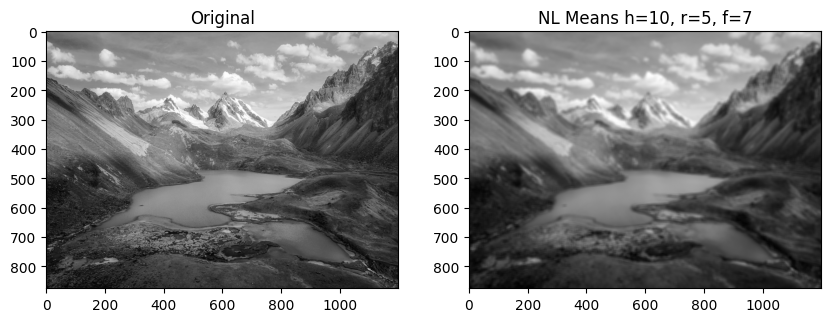

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')
plt.title(f'NL Means h={h}, r={r}, f={f}')
plt.show()

## Comparaison des méthodes


In [20]:
# Faire varier le bruit et certains paramètres des méthodes en fonction
f0 = 4
img_butterwoth = ideal(img_gray, f0)
d0,n = 10,100
img_ideal = butterworth(img_gray, d0, n)
sigma,ksize = 5,7
img_gaussian = gaussian(img_gray,ksize,sigma)
dt,n = 0.1,100
img_chaleur = heat_equation(img_gray, dt, n)
dt,n = 0.1,100
img_malik= MalikPerona(img_gray, dt, n)

<ipython-input-8-db1064501a76>:32: RuntimeWarning: overflow encountered in power
  H = 1 / (1 + (D / D0)**(2 * n))


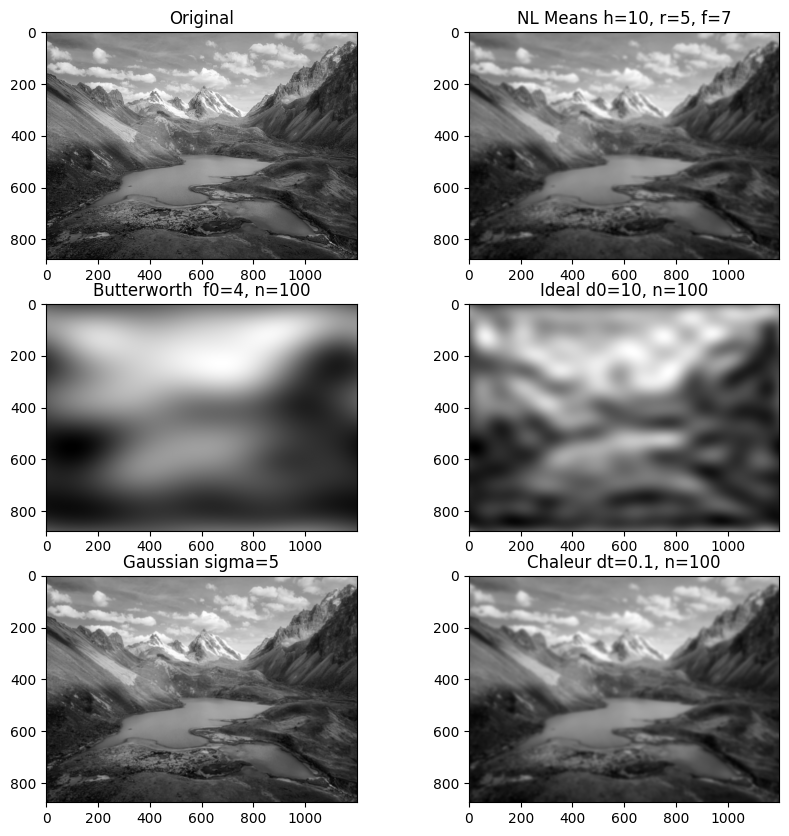

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original')
plt.subplot(3,2,2)
plt.imshow(result, cmap='gray')
plt.title(f'NL Means h={h}, r={r}, f={f}')
plt.subplot(3,2,3)
plt.imshow(img_butterwoth, cmap='gray')
plt.title(f'Butterworth  f0={f0}, n={n}')
plt.subplot(3,2,4)
plt.imshow(img_ideal, cmap='gray')
plt.title(f'Ideal d0={d0}, n={n}')
plt.subplot(3,2,5)
plt.imshow(img_gaussian, cmap='gray')
plt.title(f'Gaussian sigma={sigma}')
plt.subplot(3,2,6)
plt.imshow(img_chaleur, cmap='gray')
plt.title(f'Chaleur dt={dt}, n={n}')
plt.show()


In [ ]:
# Chaque méthode réduit le bruit avec un impact différent sur les contours et les détails.